<a href="https://colab.research.google.com/github/ngonhan2k5/cs-ml/blob/master/proj1/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prepare dataset
Follow the steps:


1.   Load data
2.   Clean up data
3.   LabelEncoder the categorical features to numeric
4.   Remove the unneccessary features
5.   Separate the data into input (X) and target (y)
6.   Split the data (X,y) into Train set, Test set


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**1.1. Load data**

In [2]:
#load data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, na_values="?")
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
#df.describe()
df.sample(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4896,36,Private,398931,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1485,50,United-States,>50K
4102,21,Private,177125,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,20,United-States,<=50K
29138,40,Self-emp-not-inc,34007,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,70,United-States,>50K
30641,38,Self-emp-not-inc,67317,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K


**1.2 Clean up data**

As analyzed in the EDA, I remove the records missing values

In [3]:
#remove records missing values
no_missing_df= df.drop(df[df.native_country.isnull()].index)
no_missing_df= no_missing_df.drop(no_missing_df[no_missing_df.workclass.isnull()].index)
no_missing_df= no_missing_df.drop(no_missing_df[no_missing_df.occupation.isnull()].index)
no_missing_df.isnull().sum().max() #just checking that there's no missing data missing...

0

**1.3. LabelEncoder the categorical features to numeric**

Decision Tree requires numeric features. So, I transform the categorical features into numeric by using LabelEncoder

In [4]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
no_missing_df['workclass_num']= le.fit_transform(no_missing_df['workclass'])
no_missing_df['marital_status_num']= le.fit_transform(no_missing_df['marital_status'])
no_missing_df['occupation_num']= le.fit_transform(no_missing_df['occupation'])
no_missing_df['relationship_num']= le.fit_transform(no_missing_df['relationship'])
no_missing_df['race_num']= le.fit_transform(no_missing_df['race'])
no_missing_df['sex_num']= le.fit_transform(no_missing_df['sex'])
no_missing_df['native_country_num']= le.fit_transform(no_missing_df['native_country'])
no_missing_df['income_num']= le.fit_transform(no_missing_df['income'])

#.columns

**1.4. Remove the unneccessary features**

*   Remove the categorical features because they are represented by the numeric ones
*   Remove the unrelated features indicated in the EDA



In [5]:
#remove the unnecessary features
neccessary_columns_df= no_missing_df.drop(columns=['fnlwgt', 'education', 'workclass', 'income', 'marital_status', 'occupation', 'sex', 'relationship', 'native_country', 'race'])
#neccessary_columns_df.columns

**1.5. Separate the data into input (X) and target (y)**

In [6]:
#separate input and target
X= neccessary_columns_df.drop('income_num', axis='columns')
y= neccessary_columns_df['income_num']

**1.6. Split the data (X,y) into Train set, Test set**

Shuffle then split the data

In [7]:
#Shuffle and Split data into Training, Testing dataframe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=1)
print("Training Data:", X_train.shape, y_train.shape)
print("Testing Data :", X_test.shape, y_test.shape)
print('Train: {}% | Test {}%'.format(round(len(y_train)/len(y),2), round(len(y_test)/len(y),2)))

Training Data: (24128, 12) (24128,)
Testing Data : (6033, 12) (6033,)
Train: 0.8% | Test 0.2%


# 2. Training Model (Decision Tree Classifier)

Follow 2 steps to train the model
1.   Tune hyper-parameters to find the ones can build the best model
2.   Apply the best ones to train the Decision Tree Classifier model

Then I show the Confusion matrix, Precision, Recall and F1-score



**2.1. Tuning Hyper-Parameters to find the best ones**

Use **GridSearchCV** for tuning

In [8]:
from sklearn.model_selection import GridSearchCV
def get_the_GridSearcCV(model, param_dist, X, y):
  gs= GridSearchCV(model, param_dist)
  gs.fit(X, y)
  print('Tuning Hyper-Parameters:')
  print('  - The best parameters: ', gs.best_params_)
  print('  - The best score: ', gs.best_score_)
  return gs

In [9]:
#Tuning hyper-parameters by using GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_dist= {'criterion': ['gini','entropy'],
             'max_depth': [3,4,5,6,7,8,9],
             'min_samples_leaf': [2,3,4,5,],
             'min_samples_split': [4,5,6,7,8,9]
             }
gs= get_the_GridSearcCV(DecisionTreeClassifier(), param_dist,  X, y)

Tuning Hyper-Parameters:
  - The best parameters:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8}
  - The best score:  0.8521934070833229


**2.2. Apply the best hyper-parameters to train the model**

The best hyper-parameters:  {**'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8**}


In [10]:
best_clf= DecisionTreeClassifier(criterion= 'gini', max_depth=9, min_samples_leaf=3, min_samples_split=8)
best_clf= best_clf.fit(X_train, y_train)
score= best_clf.score(X_test, y_test)
print("Test score: ", score)

Test score:  0.8488314271506713


**2.3. The confusion matrix**

Apply the trained model to predict the Test set

In [11]:
#predict Testing set
y_predict= best_clf.predict(X_test)

#Show confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predict)
confusion_df= pd.DataFrame(cm)
print("Confussion Matrix when apply the best model to the Test data")
confusion_df

Confussion Matrix when apply the best model to the Test data


,0,1
0,4329,182
1,730,792


**2.4. Precision, Recall, F1-score**

In [12]:
# Precision, Recall, F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      4511
           1       0.81      0.52      0.63      1522

    accuracy                           0.85      6033
   macro avg       0.83      0.74      0.77      6033
weighted avg       0.84      0.85      0.84      6033



# 3. Learning Curve and Validation Curve

Try 3 models with different hyper-parameters and show the Learning Curve and Validation Curve for each model.


In [13]:
def show_curve(train_scores, test_scores, x_axis_range, title, xlabel):
  train_scores_mean= np.mean(train_scores, axis=1)
  train_scores_std= np.std(train_scores, axis=1)
  test_scores_mean= np.mean(test_scores, axis=1)
  test_scores_std= np.std(test_scores, axis=1)  
  
  plt.figure()
  plt.plot(x_axis_range, train_scores_mean, marker='o', label= "Training score")
  plt.plot(x_axis_range, test_scores_mean, marker='o', label="Cross-Validation score")

  plt.fill_between(x_axis_range, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color= '#33F4FF',alpha=0.5)
  plt.fill_between(x_axis_range, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, color= '#DDDDDD',alpha=0.5)

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel('Score')
  plt.legend(loc= 'best')

**Settings**

In [14]:
from sklearn.model_selection import learning_curve
train_sizes= np.linspace(0.01,1,10)
scoring= "accuracy"

from sklearn.model_selection import validation_curve
param_name= 'max_depth'
param_range = np.linspace(1,12,12)

**1. The best model**

Hyper-parameters= {**'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8**}

In [15]:
score= best_clf.score(X_test, y_test)
print("Test score: ", score)

Test score:  0.8488314271506713


***1.1. Learning curve***

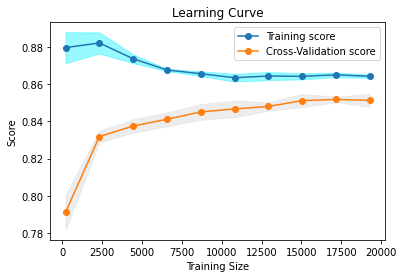

In [16]:
train_sizes_showed, train_scores, test_scores= learning_curve(best_clf, X_train, y_train, scoring=scoring, train_sizes= train_sizes)
show_curve(train_scores, test_scores, train_sizes_showed, 'Learning Curve', 'Training Size')

The y-axis is '**score**', so the higher the score, the better the performance of the model.


*   Training score decreases gradually then be stable.
*   Cross-validation scoare increases gradually then be stable.
*   The curves are converge to around 0.85.

So, adding more data for training can't help the model better


***1.2. Validation curve***

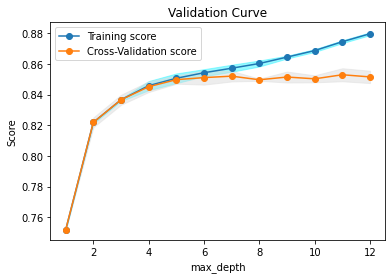

In [17]:
train_scores, test_scores= validation_curve(best_clf, X_train, y_train, param_name=param_name, param_range=param_range, scoring= scoring, error_score= 'raise' )
show_curve(train_scores, test_scores, param_range, 'Validation Curve', param_name)

- max_depth > 9: the model is overfitting 
- max_depth = 9: can get the best validation score

**2. The second model**

Hyper-parameters= {**'criterion': 'gini', 'max_depth': 100**}

In [18]:
second_clf= DecisionTreeClassifier(criterion= 'gini', max_depth=100)
second_clf= second_clf.fit(X_train, y_train)
score= second_clf.score(X_test, y_test)
print("Test score: ", score)

Test score:  0.8045748383888612


***2.1. Learning curve***

[learning_curve] Training set sizes: [  193  2316  4439  6562  8685 10809 12932 15055 17178 19302]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished


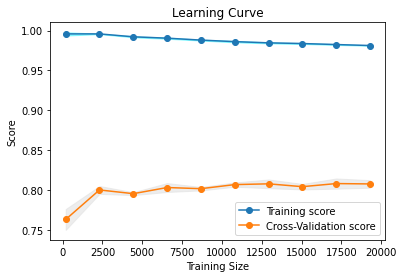

In [19]:
train_sizes_showed, train_scores, test_scores= learning_curve(second_clf, X_train, y_train, scoring=scoring, train_sizes= train_sizes, verbose=1)
show_curve(train_scores, test_scores, train_sizes_showed, 'Learning Curve', 'Training Size')

The y-axis is '**score**', so the higher the score, the better the performance of the model.


*   Training score is so high.
*   Cross-validation score is slow

The model is overfitting, so increasing the training data size can't improve the model. So, tuning hyper-parameters can get it better.


***2.2. Validation curve***

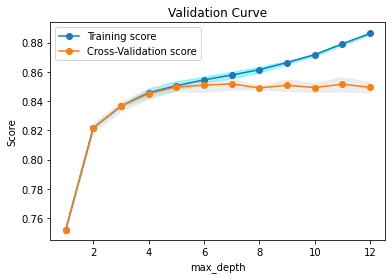

In [20]:
train_scores, test_scores= validation_curve(second_clf, X_train, y_train, param_name=param_name, param_range=param_range, scoring= scoring, error_score= 'raise' )
show_curve(train_scores, test_scores, param_range, 'Validation Curve', param_name)

- max_depth > 9: the model is overfitting 
- max_depth = 9: can get the best validation score

**3. The third model**

Hyper-parameters= {**'criterion': 'entropy'**}

In [21]:
third_clf= DecisionTreeClassifier(criterion= 'entropy')
third_clf= third_clf.fit(X_train, y_train)
score= third_clf.score(X_test, y_test)
print("Test score: ", score)

Test score:  0.808055693684734


***3.1. Learning curve***

[learning_curve] Training set sizes: [  193  2316  4439  6562  8685 10809 12932 15055 17178 19302]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished


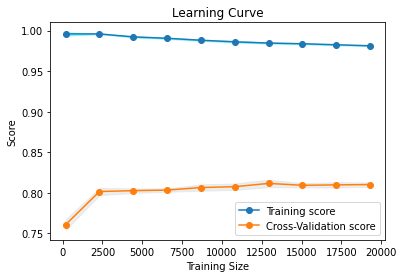

In [22]:
train_sizes_showed, train_scores, test_scores= learning_curve(third_clf, X_train, y_train, scoring=scoring, train_sizes= train_sizes, verbose=1)
show_curve(train_scores, test_scores, train_sizes_showed, 'Learning Curve', 'Training Size')

The y-axis is '**score**', so the higher the score, the better the performance of the model.

- Training score is so high.
- Cross-validation score is slow

The model is overfitting, so increasing the training data size can't improve the model. So, tuning hyper-parameters can get it better.

***3.2. Validation curve***

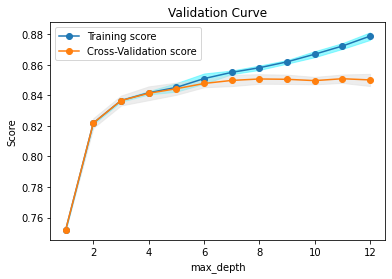

In [23]:
train_scores, test_scores= validation_curve(third_clf, X_train, y_train, param_name=param_name, param_range=param_range, scoring=scoring)
show_curve(train_scores, test_scores, param_range, 'Validation Curve', param_name)

- max_depth > 9: the model is overfitting 
- max_depth = 9: can get the best validation score